**IPL Stats: This is exploring K-means Clustering Technique which is segmenting teams into respective clusters based on features**

**Note: The data that will be used for K-means is for 2017 Season**
**Chi Square Test is also done to find Correlation between the impact of toss wins on the result of the match**

**p-value<=0.05 , there is significant relation between toss wins and result of the math** ,
   **p-value >0.05 , there is no relation between toss wins and result of the match**

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [36]:
df = pd.read_csv(r'C:\Users\rohil\Downloads\matches.csv')
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [37]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [38]:
df.dtypes

id                   int64
season               int64
city                object
date                object
team1               object
team2               object
toss_winner         object
toss_decision       object
result              object
dl_applied           int64
winner              object
win_by_runs          int64
win_by_wickets       int64
player_of_match     object
venue               object
umpire1             object
umpire2             object
umpire3            float64
dtype: object

**Basic Stats of the dataset**

In [39]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


**Dataset filtered for 2017 Season**

In [40]:
df_season = df[df['season'] == 2017]
df_season

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


**Chi - Squared Test**

**In 2017 Season , there is high correlation between tosses won and the overall result of the match**

In [41]:
import pandas as pd
from scipy.stats import chi2_contingency

# Sample Data (as above)
# ... df_season = pd.DataFrame(data)

# Create a contingency table
contingency_table = pd.crosstab(df_season['toss_winner'], df_season['winner'])
print("Contingency Table (Toss Winner vs. Match Winner):")
print(contingency_table)

# Perform Chi-Squared test for independence
chi2, p_value, dof, expected_freq = chi2_contingency(contingency_table)

print(f"\nChi-squared statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")
# print("\nExpected Frequencies (if independent):")
# print(pd.DataFrame(expected_freq, index=contingency_table.index, columns=contingency_table.columns))

alpha = 0.05 # Significance level
if p_value < alpha:
    print("\nReject null hypothesis: There is a significant association between winning the toss and winning the match.")
else:
    print("\nFail to reject null hypothesis: There is no significant association (or evidence is insufficient) between winning the toss and winning the match.")

Contingency Table (Toss Winner vs. Match Winner):
winner                       Delhi Daredevils  Gujarat Lions  Kings XI Punjab  \
toss_winner                                                                     
Delhi Daredevils                            5              0                0   
Gujarat Lions                               0              4                1   
Kings XI Punjab                             0              0                2   
Kolkata Knight Riders                       0              0                1   
Mumbai Indians                              0              0                1   
Rising Pune Supergiant                      1              0                0   
Royal Challengers Bangalore                 0              0                2   
Sunrisers Hyderabad                         0              0                0   

winner                       Kolkata Knight Riders  Mumbai Indians  \
toss_winner                                                          

# **K-means Clustering Technique for 2017 Season**

# **Step 1 - Feature Engineering**

In [42]:
import pandas as pd
import numpy as np

def calculate_team_features(df_season):
    """Calculate comprehensive team features from IPL dataset"""
    team_stats = {}
    
    # Get all unique teams
    teams = set(df_season['team1'].unique()) | set(df_season['team2'].unique())
    
    for team in teams:
        # Get team's matches (as team1 or team2)
        team_matches = df_season[(df_season['team1'] == team) | (df_season['team2'] == team)].copy()
        
        # Basic metrics
        total_matches = len(team_matches)
        wins = len(team_matches[team_matches['winner'] == team])
        
        if total_matches == 0:
            continue
            
        # Toss analysis
        toss_wins = len(team_matches[team_matches['toss_winner'] == team])
        
        # When team wins toss
        toss_won_matches = team_matches[team_matches['toss_winner'] == team]
        toss_won_victories = len(toss_won_matches[toss_won_matches['winner'] == team])
        
        # When team loses toss
        toss_lost_matches = team_matches[team_matches['toss_winner'] != team]
        toss_lost_victories = len(toss_lost_matches[toss_lost_matches['winner'] == team])
        
        # Victory margins
        wins_by_runs = team_matches[(team_matches['winner'] == team) & 
                                   (team_matches['win_by_runs'] > 0)]
        wins_by_wickets = team_matches[(team_matches['winner'] == team) & 
                                      (team_matches['win_by_wickets'] > 0)]
        
        # Player of match
        potm_wins = 0
        for idx, match in team_matches[team_matches['winner'] == team].iterrows():
            if pd.notna(match['player_of_match']):
                potm_wins += 1
        
        # Venue adaptability
        venue_win_rates = []
        for venue in team_matches['venue'].unique():
            venue_matches = team_matches[team_matches['venue'] == venue]
            if len(venue_matches) >= 3:  # Only consider venues with sufficient matches
                venue_win_rate = len(venue_matches[venue_matches['winner'] == team]) / len(venue_matches)
                venue_win_rates.append(venue_win_rate)
        
        venue_adaptability = 1 - np.std(venue_win_rates) if len(venue_win_rates) > 1 else 0.5
        
        # Calculate all features
        team_stats[team] = {
            'total_matches': total_matches,
            'win_rate': wins / total_matches,
            'toss_win_rate': toss_wins / total_matches,
            'toss_dependency': (
                (toss_won_victories / toss_wins if toss_wins > 0 else 0) - 
                (toss_lost_victories / (total_matches - toss_wins) if (total_matches - toss_wins) > 0 else 0)
            ),
            'runs_victory_rate': len(wins_by_runs) / wins if wins > 0 else 0,
            'wickets_victory_rate': len(wins_by_wickets) / wins if wins > 0 else 0,
            'avg_runs_margin': wins_by_runs['win_by_runs'].mean() if len(wins_by_runs) > 0 else 0,
            'avg_wickets_margin': wins_by_wickets['win_by_wickets'].mean() if len(wins_by_wickets) > 0 else 0,
            'potm_rate': potm_wins / wins if wins > 0 else 0,
            'venue_adaptability': venue_adaptability,
            'dl_involvement': len(team_matches[team_matches['dl_applied'] == 1]) / total_matches
        }
    
    return pd.DataFrame(team_stats).T

# Step 1: Calculate features
team_features_raw = calculate_team_features(df_season)  # df is your IPL dataset
print(f"Raw features calculated for {len(team_features_raw)} teams")
print(team_features_raw.head())

Raw features calculated for 8 teams
                             total_matches  win_rate  toss_win_rate  \
Rising Pune Supergiant                16.0  0.625000       0.375000   
Royal Challengers Bangalore           13.0  0.230769       0.692308   
Kolkata Knight Riders                 16.0  0.562500       0.562500   
Mumbai Indians                        17.0  0.705882       0.647059   
Gujarat Lions                         14.0  0.285714       0.500000   

                             toss_dependency  runs_victory_rate  \
Rising Pune Supergiant              0.333333           0.500000   
Royal Challengers Bangalore        -0.027778           1.000000   
Kolkata Knight Riders               0.238095           0.222222   
Mumbai Indians                     -0.196970           0.333333   
Gujarat Lions                       0.571429           0.000000   

                             wickets_victory_rate  avg_runs_margin  \
Rising Pune Supergiant                   0.500000        24.6000

# **Step 2 - Preprocessing of features**

In [43]:
def preprocess_features(team_features_df):
    """Clean and prepare features for clustering"""
    
    # Handle missing values
    team_features_clean = team_features_df.fillna(0)
    
    # Remove teams with insufficient data (< 10 matches)
    min_matches_threshold = 10
    team_features_clean = team_features_clean[
        team_features_clean['total_matches'] >= min_matches_threshold
    ]
    
    # Handle infinite values (from division by zero)
    team_features_clean = team_features_clean.replace([np.inf, -np.inf], 0)
    
    print(f"After cleaning: {len(team_features_clean)} teams with sufficient data")
    
    return team_features_clean

# Step 2: Clean the data
team_features_clean = preprocess_features(team_features_raw)
print("Teams after cleaning:", team_features_clean.index.tolist())

After cleaning: 8 teams with sufficient data
Teams after cleaning: ['Rising Pune Supergiant', 'Royal Challengers Bangalore', 'Kolkata Knight Riders', 'Mumbai Indians', 'Gujarat Lions', 'Delhi Daredevils', 'Kings XI Punjab', 'Sunrisers Hyderabad']


In [44]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering (exclude metadata)
clustering_features = [
    'win_rate', 'toss_win_rate', 'toss_dependency', 
    'runs_victory_rate', 'wickets_victory_rate',
    'avg_runs_margin', 'avg_wickets_margin', 
    'potm_rate', 'venue_adaptability', 'dl_involvement'
]

# Extract clustering features
features_for_clustering = team_features_clean[clustering_features]

# Scale features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_for_clustering)

# Convert back to DataFrame for easier handling
features_scaled_df = pd.DataFrame(
    features_scaled,
    columns=clustering_features,
    index=features_for_clustering.index
)

print(f"Scaled features shape: {features_scaled_df.shape}")
print("Features being used for clustering:", clustering_features)

Scaled features shape: (8, 10)
Features being used for clustering: ['win_rate', 'toss_win_rate', 'toss_dependency', 'runs_victory_rate', 'wickets_victory_rate', 'avg_runs_margin', 'avg_wickets_margin', 'potm_rate', 'venue_adaptability', 'dl_involvement']


# **Step 3- Clustering Pipeline**

In [45]:
# If you don't have the dataset yet, here's how to test with sample data
def create_sample_ipl_data():
    """Create sample IPL data for testing"""
    np.random.seed(42)
    
    teams = ['MI', 'CSK', 'RCB', 'KKR', 'DC', 'PBKS', 'RR', 'SRH']
    venues = ['Wankhede', 'Chepauk', 'Chinnaswamy', 'Eden Gardens', 'Feroz Shah Kotla']
    
    sample_data = []
    match_id = 1
    
    for season in [2017]:
        for _ in range(60):  # 60 matches per season
            team1, team2 = np.random.choice(teams, 2, replace=False)
            toss_winner = np.random.choice([team1, team2])
            toss_decision = np.random.choice(['bat', 'field'])
            
            # Simulate match outcome (some teams slightly better)
            if team1 in ['MI', 'CSK']:
                winner_prob = 0.6
            elif team2 in ['MI', 'CSK']:
                winner_prob = 0.4
            else:
                winner_prob = 0.5
                
            winner = team1 if np.random.random() < winner_prob else team2
            
            # Simulate margins
            if np.random.random() < 0.6:  # 60% wins by runs
                win_by_runs = np.random.randint(1, 100)
                win_by_wickets = 0
            else:  # 40% wins by wickets
                win_by_runs = 0
                win_by_wickets = np.random.randint(1, 10)
            
            sample_data.append({
                'id': match_id,
                'season': season,
                'city': np.random.choice(['Mumbai', 'Chennai', 'Bangalore', 'Kolkata', 'Delhi']),
                'date': f'{season}-04-{np.random.randint(1, 30):02d}',
                'team1': team1,
                'team2': team2,
                'toss_winner': toss_winner,
                'toss_decision': toss_decision,
                'result': 'normal',
                'dl_applied': np.random.choice([0, 1], p=[0.9, 0.1]),
                'winner': winner,
                'win_by_runs': win_by_runs,
                'win_by_wickets': win_by_wickets,
                'player_of_match': f'Player_{np.random.randint(1, 100)}',
                'venue': np.random.choice(venues),
                'umpire1': f'Umpire_{np.random.randint(1, 20)}',
                'umpire2': f'Umpire_{np.random.randint(1, 20)}',
                'umpire3': f'Umpire_{np.random.randint(1, 20)}'
            })
            match_id += 1
    
    return pd.DataFrame(sample_data)

# Create sample data if needed
# df = create_sample_ipl_data()
# print(f"Sample dataset created with {len(df)} matches")

# Now run the complete pipeline
print("=== COMPLETE TEAM CLUSTERING PIPELINE ===")

# Step 1: Calculate features
print("\nStep 1: Calculating team features...")
team_features_raw = calculate_team_features(df)

# Step 2: Clean data
print("\nStep 2: Cleaning data...")
team_features_clean = preprocess_features(team_features_raw)

# Step 3: Scale features
print("\nStep 3: Scaling features...")
features_for_clustering = team_features_clean[clustering_features]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_for_clustering)
features_scaled_df = pd.DataFrame(features_scaled, columns=clustering_features, index=features_for_clustering.index)

print("✅ Steps 1-3 completed successfully!")
print(f"Ready for clustering with {len(team_features_clean)} teams")
print(f"Features: {clustering_features}")

=== COMPLETE TEAM CLUSTERING PIPELINE ===

Step 1: Calculating team features...

Step 2: Cleaning data...
After cleaning: 14 teams with sufficient data

Step 3: Scaling features...
✅ Steps 1-3 completed successfully!
Ready for clustering with 14 teams
Features: ['win_rate', 'toss_win_rate', 'toss_dependency', 'runs_victory_rate', 'wickets_victory_rate', 'avg_runs_margin', 'avg_wickets_margin', 'potm_rate', 'venue_adaptability', 'dl_involvement']


# **Step 4 - Getting Optimal Number of Clusters**

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def find_optimal_clusters(features_scaled, max_k=10):
    """Find optimal number of clusters using multiple methods"""
    
    K_range = range(2, max_k + 1)
    inertias = []
    silhouette_scores = []
    
    for k in K_range:
        # K-means clustering
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(features_scaled)
        
        # Calculate metrics
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(features_scaled, cluster_labels))
    
    # Find elbow point
    elbow_k = find_elbow_point(inertias, K_range)
    
    # Find best silhouette score
    best_silhouette_k = K_range[np.argmax(silhouette_scores)]
    
    return {
        'elbow_k': elbow_k,
        'silhouette_k': best_silhouette_k,
        'inertias': inertias,
        'silhouette_scores': silhouette_scores,
        'recommended_k': best_silhouette_k  # Use silhouette as primary metric
    }

def find_elbow_point(inertias, k_range):
    """Find elbow point using rate of change"""
    differences = np.diff(inertias)
    second_differences = np.diff(differences)
    elbow_index = np.argmax(second_differences) + 2  # +2 due to double diff
    return k_range[elbow_index] if elbow_index < len(k_range) else k_range[-1]

# Find optimal clusters
cluster_analysis = find_optimal_clusters(features_scaled)
optimal_k = cluster_analysis['recommended_k']
print(f"Recommended number of clusters: {optimal_k}")

Recommended number of clusters: 2


# **Step 5 -Applying K-means technique**

In [47]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

def apply_clustering_methods(features_scaled, n_clusters):
    """Apply multiple clustering methods for comparison"""
    
    clustering_results = {}
    
    # 1. K-Means Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    clustering_results['kmeans'] = kmeans.fit_predict(features_scaled)
    
    # 2. Hierarchical Clustering
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    clustering_results['hierarchical'] = hierarchical.fit_predict(features_scaled)
    
    # 3. Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    clustering_results['gmm'] = gmm.fit_predict(features_scaled)
    
    # 4. DBSCAN (density-based)
    dbscan = DBSCAN(eps=0.5, min_samples=2)
    clustering_results['dbscan'] = dbscan.fit_predict(features_scaled)
    
    return clustering_results, {'kmeans': kmeans, 'hierarchical': hierarchical, 'gmm': gmm, 'dbscan': dbscan}

# Apply clustering
cluster_results, cluster_models = apply_clustering_methods(features_scaled, optimal_k)

# Select best method (typically K-means for interpretability)
final_clusters = cluster_results['kmeans']
final_model = cluster_models['kmeans']

# **Step 6 - Feature Validation**

In [48]:
import numpy as np # Make sure numpy is imported if not already
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def validate_clustering(features_input, cluster_labels): # Renamed for clarity within function
    """Validate clustering quality using multiple metrics"""
    
    # Remove noise points for DBSCAN (label = -1)
    valid_points = cluster_labels != -1
    
    # Ensure there are at least 2 distinct clusters or enough points for silhouette
    unique_labels = np.unique(cluster_labels[valid_points])
    if len(unique_labels) < 2 or np.sum(valid_points) < 2: # Need at least 2 clusters for silhouette/DB
        print(f"Skipping validation: Not enough valid points or clusters. Points: {np.sum(valid_points)}, Unique labels: {unique_labels}")
        return None
    
    # Ensure features_input is a NumPy array if it wasn't already (though it should be by now)
    # This is just a safeguard; the main fix is outside this function
    if not isinstance(features_input, np.ndarray):
        features_input = np.array(features_input)

    validation_metrics = {
        'silhouette_score': silhouette_score(features_input[valid_points], cluster_labels[valid_points]),
        'calinski_harabasz_score': calinski_harabasz_score(features_input[valid_points], cluster_labels[valid_points]),
        'davies_bouldin_score': davies_bouldin_score(features_input[valid_points], cluster_labels[valid_points]),
        'n_clusters': len(unique_labels),
        'n_noise_points': np.sum(~valid_points)
    }
    
    return validation_metrics

# Assume cluster_results and features_scaled are defined earlier
# e.g., features_scaled = scaler.fit_transform(my_dataframe_features)
# features_scaled IS NOW A NUMPY ARRAY

# Validate all clustering methods
validation_results = {}
for method, labels in cluster_results.items():
    # --- THIS IS THE CORRECTED LINE ---
    validation_results[method] = validate_clustering(features_scaled, labels) 
    
print("Clustering Validation Results:")
for method, metrics in validation_results.items():
    if metrics:
        print(f"{method}: Silhouette={metrics['silhouette_score']:.3f}, "
              f"CH Score={metrics['calinski_harabasz_score']:.3f}, "
              f"Davies-Bouldin={metrics['davies_bouldin_score']:.3f}, "
              f"Clusters={metrics['n_clusters']}, Noise={metrics['n_noise_points']}")
    else:
        print(f"{method}: Could not be validated (e.g., too few clusters or points).")

Skipping validation: Not enough valid points or clusters. Points: 0, Unique labels: []
Clustering Validation Results:
kmeans: Silhouette=0.433, CH Score=5.011, Davies-Bouldin=0.383, Clusters=2, Noise=0
hierarchical: Silhouette=0.433, CH Score=5.011, Davies-Bouldin=0.383, Clusters=2, Noise=0
gmm: Silhouette=0.152, CH Score=3.158, Davies-Bouldin=1.826, Clusters=2, Noise=0
dbscan: Could not be validated (e.g., too few clusters or points).


# **Step 7 -Cluster Analysis**

In [49]:
import numpy as np
import pandas as pd # Assuming your data is in pandas DataFrames

# --- Your existing functions ---
def identify_cluster_characteristics(cluster_data, features):
    """Identify key characteristics of a cluster"""
    characteristics = {}
    avg_win_rate = cluster_data['win_rate'].mean()
    avg_toss_dep = cluster_data['toss_dependency'].mean()
    avg_runs_rate = cluster_data['runs_victory_rate'].mean()
    
    if avg_win_rate > 0.55:
        characteristics['performance'] = 'High Performer'
    elif avg_win_rate > 0.45:
        characteristics['performance'] = 'Moderate Performer'
    else:
        characteristics['performance'] = 'Underperformer'
    
    if avg_toss_dep > 0.15:
        characteristics['toss_dependency'] = 'Toss Dependent'
    elif avg_toss_dep < -0.05:
        characteristics['toss_dependency'] = 'Toss Independent'
    else:
        characteristics['toss_dependency'] = 'Moderate Toss Impact'
    
    if avg_runs_rate > 0.6:
        characteristics['style'] = 'Batting First Specialists'
    elif avg_runs_rate < 0.4:
        characteristics['style'] = 'Chase Masters'
    else:
        characteristics['style'] = 'Balanced Approach'
    return characteristics

# --- YOU NEED TO DEFINE THIS FUNCTION ---
def find_distinguishing_features(cluster_df, all_data_df, feature_names, threshold=0.25):
    """
    Identifies features that are notably different for a cluster compared to the overall dataset.
    
    Args:
        cluster_df (pd.DataFrame): DataFrame containing only the data for the current cluster.
        all_data_df (pd.DataFrame): DataFrame containing all data (including other clusters).
        feature_names (list): List of feature columns to compare.
        threshold (float): Percentage difference threshold to consider a feature "distinguishing".
                           For example, 0.25 means the cluster's mean for a feature
                           is 25% higher or lower than the overall mean.
                           
    Returns:
        dict: A dictionary where keys are distinguishing feature names and values
              describe the distinction (e.g., "higher", "lower", or the actual values).
    """
    distinguishing = {}
    overall_means = all_data_df[feature_names].mean()
    cluster_means = cluster_df[feature_names].mean()
    
    for feature in feature_names:
        overall_mean = overall_means[feature]
        cluster_mean = cluster_means[feature]
        
        # Avoid division by zero if overall_mean is 0
        if overall_mean == 0 and cluster_mean != 0:
            relative_diff = float('inf') # Consider it infinitely different
        elif overall_mean == 0 and cluster_mean == 0:
            relative_diff = 0.0
        else:
            relative_diff = (cluster_mean - overall_mean) / abs(overall_mean) # Relative difference
            
        if abs(relative_diff) > threshold:
            if relative_diff > 0:
                distinguishing[feature] = f"Significantly Higher (Cluster: {cluster_mean:.2f}, Overall: {overall_mean:.2f})"
            else:
                distinguishing[feature] = f"Significantly Lower (Cluster: {cluster_mean:.2f}, Overall: {overall_mean:.2f})"
                
    if not distinguishing:
        return "No strong distinguishing features based on mean comparison."
        
    return distinguishing

# --- Your analyze_clusters function (unchanged, but now it can find the function above) ---
def analyze_clusters(team_features_df, cluster_labels, feature_names):
    """Analyze and interpret cluster characteristics"""
    cluster_analysis = {}
    
    clustered_data = team_features_df.copy()
    clustered_data['cluster'] = cluster_labels
    
    # Calculate overall means once, if your distinguishing_features function needs it
    # For the example above, it's better to pass the full 'clustered_data' and let
    # 'find_distinguishing_features' calculate overall means from that.
    
    for cluster_id in np.unique(cluster_labels):
        if cluster_id == -1:  # Skip noise points
            continue
            
        cluster_teams_df = clustered_data[clustered_data['cluster'] == cluster_id]
        
        cluster_analysis[cluster_id] = {
            'teams': cluster_teams_df.index.tolist(),
            'size': len(cluster_teams_df),
            'centroid': cluster_teams_df[feature_names].mean().to_dict(), # .to_dict() for cleaner output
            'characteristics': identify_cluster_characteristics(cluster_teams_df, feature_names),
            # Call the now-defined function
            'distinguishing_features': find_distinguishing_features(cluster_teams_df, clustered_data, feature_names)
        }
    
    return cluster_analysis

# --- Example Usage (assuming these variables are defined) ---
# team_features_clean = pd.DataFrame(...) # Your features DataFrame, with team names as index
# final_clusters = np.array(...)       # Array of cluster labels corresponding to team_features_clean
# clustering_features = ['win_rate', 'toss_dependency', 'runs_victory_rate', ...] # List of feature names

# # Dummy data for demonstration:
# team_names = [f"Team_{i}" for i in range(10)]
# dummy_data = {
# 'win_rate': np.random.rand(10),
# 'toss_dependency': np.random.rand(10) * 0.3 - 0.15,
# 'runs_victory_rate': np.random.rand(10)
# }
# team_features_clean = pd.DataFrame(dummy_data, index=team_names)
# clustering_features = ['win_rate', 'toss_dependency', 'runs_victory_rate']
# # Example: 3 clusters (0, 1, 2) and some noise (-1)
# final_clusters = np.array([0, 1, 0, 2, 1, -1, 0, 2, 1, 0])


# # Perform cluster analysis
# cluster_profiles = analyze_clusters(team_features_clean, final_clusters, clustering_features)

# # Print cluster summaries
# for cluster_id, profile in cluster_profiles.items():
#     print(f"\n=== CLUSTER {cluster_id} ===")
#     print(f"Teams: {profile['teams']}")
#     print(f"Size: {profile['size']}")
#     # print(f"Centroid: {profile['centroid']}") # Can be verbose
#     print(f"Characteristics: {profile['characteristics']}")
#     print(f"Distinguishing Features: {profile['distinguishing_features']}")

# **Step 8 - Visualisation of Clusters**

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd # Make sure pandas is imported
import numpy as np  # Make sure numpy is imported

# It's good practice to pass all necessary data as arguments
def visualize_clusters(features_scaled, cluster_labels, team_names, feature_column_names):
    """Create comprehensive cluster visualizations"""
    
    # 1. PCA Visualization
    pca = PCA(n_components=2)
    features_2d = pca.fit_transform(features_scaled) # features_scaled is already a NumPy array
    
    plt.figure(figsize=(18, 6)) # Adjusted figsize for potentially more subplots or clearer labels
    
    # PCA Plot
    plt.subplot(1, 3, 1)
    # Handle cases where cluster_labels might contain -1 (noise) for colormap consistency
    unique_labels = np.unique(cluster_labels)
    if -1 in unique_labels and len(unique_labels) == 1: # Only noise points
        colors = ['gray'] * len(features_2d) # Color noise points gray
        scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1], c=colors, alpha=0.7)
    else:
        scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
        plt.colorbar(scatter, label='Cluster ID')

    plt.title('Team Clusters (PCA Visualization)')
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
    
    # Add team labels (can be very cluttered for many points)
    # Consider annotating only a few representative points or centroids if too many teams
    for i, team in enumerate(team_names):
        plt.annotate(team, (features_2d[i, 0], features_2d[i, 1]), fontsize=7, alpha=0.6,
                     textcoords="offset points", xytext=(0,5), ha='center')
    
    # 2. Cluster Sizes
    plt.subplot(1, 3, 2)
    cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
    cluster_counts.plot(kind='bar', ax=plt.gca()) # Use pandas plotting for convenience
    plt.title('Cluster Sizes')
    plt.xlabel('Cluster ID')
    plt.ylabel('Number of Teams')
    plt.xticks(rotation=0)
    
    # 3. Feature Means by Cluster (formerly 'Feature Importance')
    plt.subplot(1, 3, 3)
    # --- CORRECTED LINE HERE ---
    # features_scaled is already a NumPy array, pd.DataFrame can take it directly.
    # Use the passed feature_column_names
    cluster_means_df = pd.DataFrame(features_scaled, columns=feature_column_names)
    cluster_means_df['cluster'] = cluster_labels
    
    # Exclude noise points (-1) from mean calculation if they exist
    cluster_summary = cluster_means_df[cluster_means_df['cluster'] != -1].groupby('cluster').mean()
    
    if not cluster_summary.empty:
        sns.heatmap(cluster_summary.T, annot=True, fmt=".2f", cmap='RdYlBu_r', center=0, linewidths=.5)
        plt.title('Mean Feature Values by Cluster')
        plt.xlabel('Cluster ID')
        plt.ylabel('Features (Standardized)')
    else:
        plt.text(0.5, 0.5, "No non-noise clusters to display.", ha="center", va="center")
        plt.title('Mean Feature Values by Cluster')
        plt.xlabel('Cluster ID')
        plt.ylabel('Features (Standardized)')

    plt.tight_layout()
    plt.show()

# --- How you would call it ---
# Assume:
# features_scaled is your NumPy array of scaled features
# final_clusters is your NumPy array of cluster labels
# team_features_clean is your DataFrame from which you got team names (index)
# clustering_features is a list of your feature column names (e.g., ['win_rate', 'avg_score', ...])

# Example (make sure these variables are defined in your actual code):
# team_names_for_plot = team_features_clean.index
# feature_names_for_plot = clustering_features # or specific list of names

# visualize_clusters(features_scaled, final_clusters, team_names_for_plot, feature_names_for_plot)

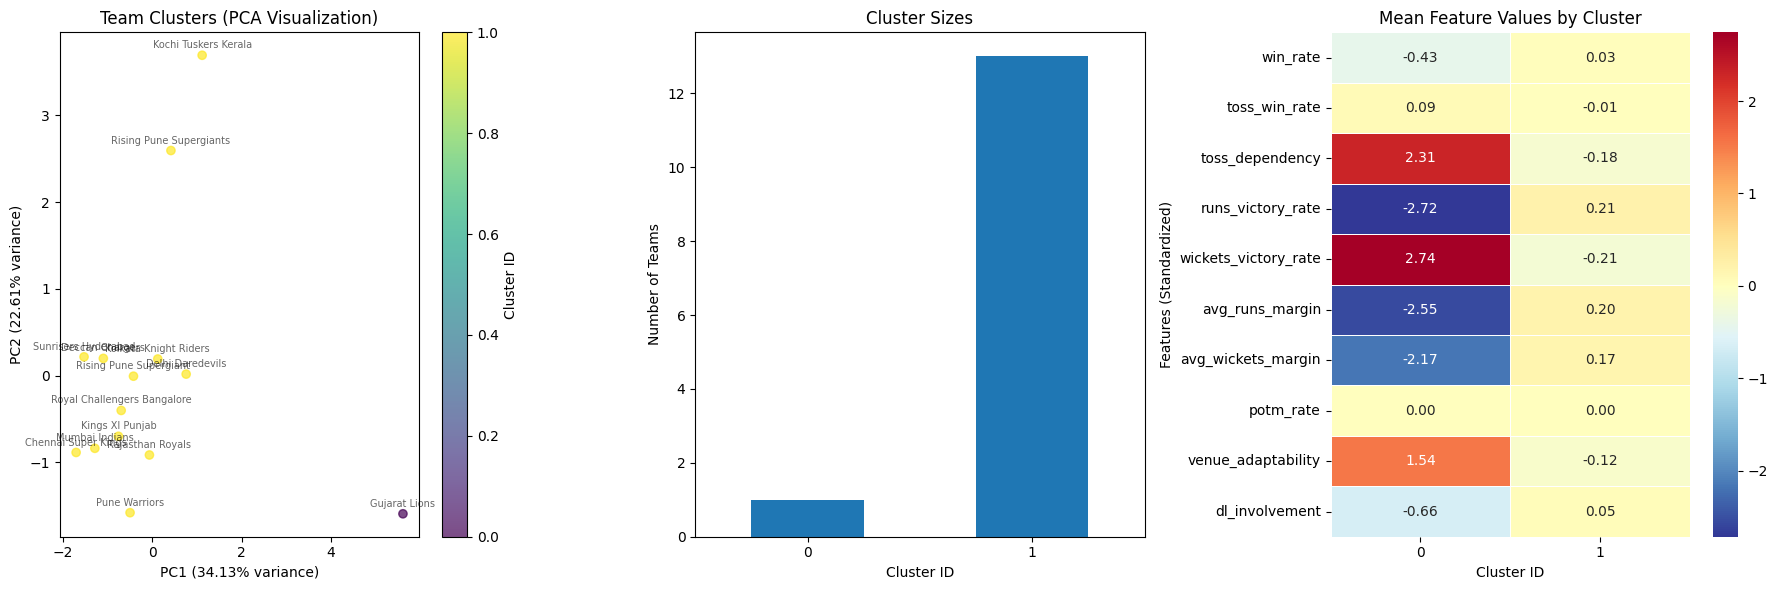

In [51]:
visualize_clusters(features_scaled, final_clusters, team_features_clean.index, clustering_features)